# 作业1：几种优化算法的实现

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)),X]
y = 4 + 3 * X + np.random.randn(100,1)
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

## AdaGrad
1. 引入背景：在随机梯度下降的算法中每次迭代所使用的学习率都是相同的，但是自梯度更新较大的部分往往需要选择较小的学习率，在梯度更新较小的部分则需要选择较大的学习率。

2. 算法：AdaGrad算法根据自变量在每个维度的梯度值大小来调整各个维度的学习率，从而可以避免单一学习率难以适应所有维度的问题。

3. 特点：由于在学习率的分母处为梯度平方的加和，在后期随着迭代轮数的增加可能会出现学习率非常小，次数更新缓慢，从而得不到最优解。

[[4.1525164 ]
 [2.81499139]]


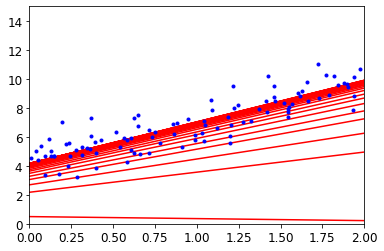

In [8]:
theta_path_sgd_adagrad=[]
coef = []
loss = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
eta=0.1
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if i<1:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r-')
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        coef.append(gradients)
        # AdamGrad
        theta = theta-eta*gradients/np.sqrt(np.sum(np.square(coef),0))
        y_predict = X_b.dot(theta)
        loss.append(np.sum(np.square(y_predict-y))/len(y))
        theta_path_sgd_adagrad.append(theta)
print(theta)
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])   
plt.show()

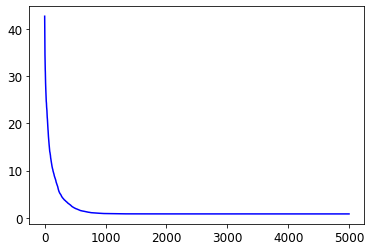

In [9]:
plt.plot(range(len(loss)),loss,'b-')

## adaDelta
1. 引入背景：改进Adagrad算法中到了后期学习率比较小，学习缓慢的现象

2. 算法：采用随机梯度$ g_t $按元素的平方的指数加权平均变量，既能保留过去的梯度更新信息，有使其保持学习率的分母不太大。


[[4.17334328]
 [2.7140818 ]]


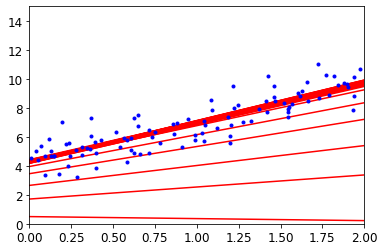

In [10]:
theta_path_sgd_adadelta=[]
coef = []
loss = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
eta=0.01
s = np.array([[0],[0]])
delta = np.array([[0],[0]])
beta = 0.9
epsilon = 1E-5
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if  i<1:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r-')
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        s = beta*s+(1-beta)*np.square(gradients)
        g = np.sqrt((delta + epsilon)/(s + epsilon))*gradients
        theta = theta - g
        delta = beta*delta + (1-beta)*np.square(g)
        y_predict = X_b.dot(theta)
        loss.append(np.sum(np.square(y_predict-y))/len(y))
        theta_path_sgd_adadelta.append(delta)
        
print(theta)
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])   
plt.show()

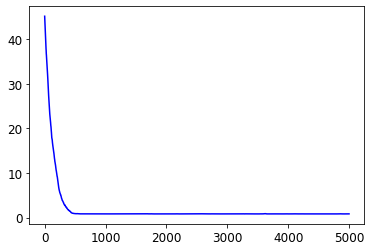

In [11]:
plt.plot(range(len(loss)),loss,'b-')

## Adam
1. 引入背景：在RMSProp算法的基础上对小批量随机梯度也做了指数加权移动平均。

2. 算法：同时采用动量和随机梯度元素的平方的指数加权平均对学习率进行修正。

[[4.08971262]
 [2.45561889]]


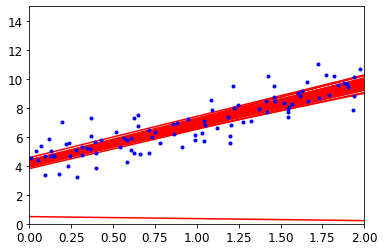

In [24]:
theta_path_sgd_adam=[]
coef = []
loss = []
length = len(X_b)
np.random.seed(42)
n_epochs = 50
eta=0.05
m = np.array([[0],[0]])
v = np.array([[0],[0]])
beta1 = 0.9
beta2 = 0.999
epsilon = 1E-8
t = 0
theta = np.random.randn(2,1)
theta1 = 0
for epoch in range(n_epochs):
    for i in range(length):
        t+=1
        if i<1:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r-')

        random_index = np.random.randint(length)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        # 这个样本的负梯度值
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        m = beta1*m +(1-beta1)*gradients
        v = beta2*v +(1-beta2)*np.square(gradients)
        m_hat = m/(1-np.power(beta1,t))
        v_hat = v/(1-np.power(beta2,t))

        theta = theta-eta*m_hat/(np.sqrt(v_hat)+epsilon)
        theta_path_sgd_adam.append(theta)
        
        y_predict = X_b.dot(theta)
        loss.append(np.sum(np.square(y_predict-y))/len(y))

print(theta)
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])   
plt.show()

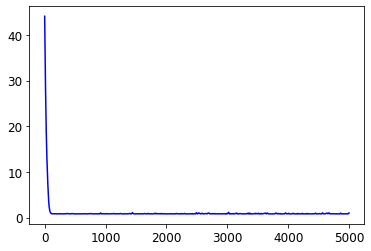

In [25]:
plt.plot(range(len(loss)),loss,'b-')

# 作业2：Ridge回归的作用

1. 岭回归的引入背景
- 最小二乘方法中$ (X^{T}X) $的逆运算需要保证该矩阵满秩，但是现实中由于存在某些列之间的线性关系比较大，导致该矩阵不满秩，此时再求逆会导致运算结果误差比较大，所以需要引入岭回归选择合适的参数，选择合适的变量。
- 实际应用中还存在一种情况，就是参数的训练之往往对于训练集的表现效果比较好，即过拟合现象，所以需要通过对参数进行惩罚来使参数的训练值保持稳定。
2. 岭回归的作用
- **筛选变量：** 通过岭迹图实现对变量选择，岭迹图中系数值接近于零的变量可以去除。
- **解决过拟合：** 通过对系数项的惩罚实现过拟合的解决。